In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./datasets/measurements.csv")

In [3]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


# データセットについて

### 目的変数
distance : 表示された距離(km)

### 説明変数
consume :        消費量(L/100km)  
speed :           平均速度(km/h)  
temp_inside :   車内温度(℃)  
temp_outside : 車外温度(℃)  
specials :        何か特別なことがあったかどうか(雨が降っていた、エアコンが効いていた、晴れていて車が暖かかったetc)  
gas_type :      ガスの種類  
AC :              specialsにACと記載されている場合１、それ以外０  
rain :             specialsにrainと記載されている場合１、それ以外０  
sun :             specialsにsunと記載されている場合１、それ以外０  
refill liters :     車が十分に冷却されていなかった場合に、メモされた値。  
refill gas :       車が十分に冷却されていなかった場合に、メモされた値。  

In [4]:
# データ型の確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
distance         388 non-null object
consume          388 non-null object
speed            388 non-null int64
temp_inside      376 non-null object
temp_outside     388 non-null int64
specials         93 non-null object
gas_type         388 non-null object
AC               388 non-null int64
rain             388 non-null int64
sun              388 non-null int64
refill liters    13 non-null object
refill gas       13 non-null object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [5]:
# 連続変数だが、object型のカラム（distance、consume、temp_inside)を数値型に変換する。

# 「,」を取り除く
df['distance']= df['distance'].str.replace(',', '')
df['consume']= df['consume'].str.replace(',', '')
df['temp_inside']= df['temp_inside'].str.replace(',', '')

# 数値型に変換する
df['distance'] = pd.to_numeric(df['distance'])
df['consume'] = pd.to_numeric(df['consume'])
df['temp_inside'] = pd.to_numeric(df['temp_inside'])

In [6]:
# データ型が変更されているかの確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
distance         388 non-null int64
consume          388 non-null int64
speed            388 non-null int64
temp_inside      376 non-null float64
temp_outside     388 non-null int64
specials         93 non-null object
gas_type         388 non-null object
AC               388 non-null int64
rain             388 non-null int64
sun              388 non-null int64
refill liters    13 non-null object
refill gas       13 non-null object
dtypes: float64(1), int64(7), object(4)
memory usage: 36.5+ KB


In [7]:
# 統計データの確認
df.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000
mean,172.891753,43.649485,41.927835,130.563830,11.358247,0.077320,0.123711,0.082474
std,211.910501,17.779320,13.598524,98.461532,6.991542,0.267443,0.329677,0.275441
min,2.000000,4.000000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000
25%,86.000000,41.000000,32.750000,22.000000,7.000000,0.000000,0.000000,0.000000
50%,124.000000,46.000000,40.500000,215.000000,10.000000,0.000000,0.000000,0.000000
75%,184.000000,52.000000,50.000000,215.000000,16.000000,0.000000,0.000000,0.000000
max,2161.000000,122.000000,90.000000,255.000000,31.000000,1.000000,1.000000,1.000000


In [8]:
# 欠損値を確認する
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
refill gas,375,96.649485
refill liters,375,96.649485
specials,295,76.030928
temp_inside,12,3.092784
sun,0,0.000000
rain,0,0.000000
AC,0,0.000000
gas_type,0,0.000000
temp_outside,0,0.000000
speed,0,0.000000


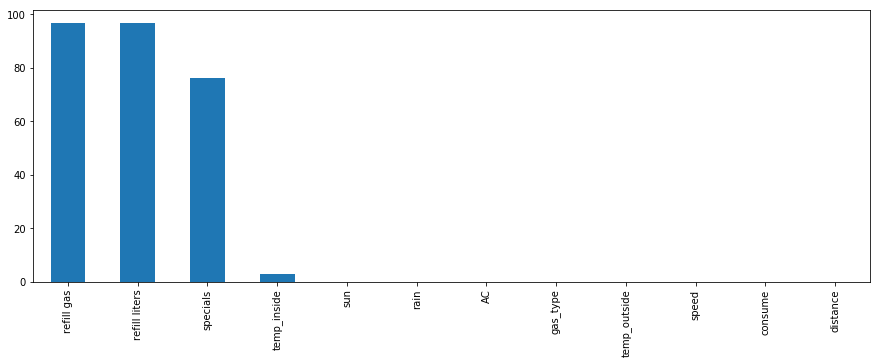

In [9]:
missing_data['Percent'].plot.bar(figsize=(15,5))

欠損率の高いカラムは使用しないことにする。  
・refill gas	  
・refill liters  
・specials  
  
また、「temp_inside」には、欠損値が3%存在するため平均値で補完を行う。

In [10]:
# 「temp_inside」の欠損値を平均値で補完を行う。
df['temp_inside'] = df['temp_inside'].fillna(df['temp_inside'].mean())

# 連続変数のみで線形回帰分析を行う。
df = df[['distance', 'consume', 'speed', 'temp_inside', 'temp_outside']]

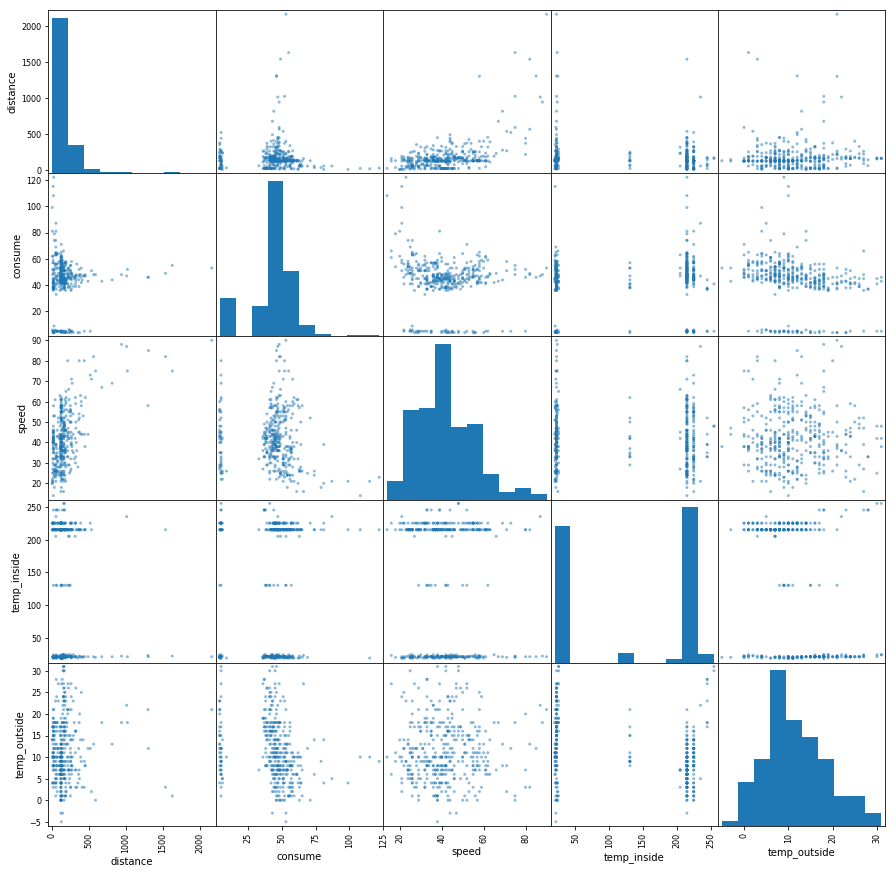

In [11]:
# 散布図行列を書いてみる
pd.plotting.scatter_matrix(df, figsize=(15,15))
plt.show()

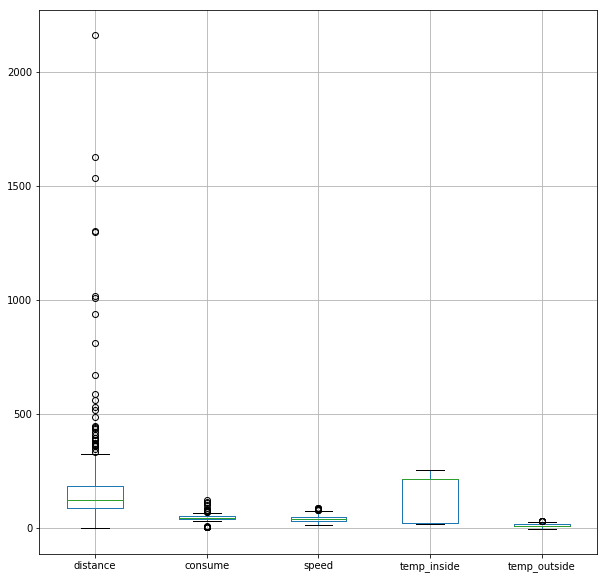

In [12]:
# 箱ひげ図をプロット
df.boxplot(figsize=(10,10))

# 線形回帰モデル

In [13]:
df_X = df[['consume', 'speed', 'temp_inside', 'temp_outside']]
df_y = df['distance']

In [14]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression(fit_intercept=True)
regr.fit(df_X, df_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]
w3 = regr.coef_[2]
w4 = regr.coef_[3]
x = df_X.values
y = df_y.values

In [16]:
y_est_sklearn = w0 + w1 * x[:,0] + w2 * x[:,1]  + w3 * x[:,2]  + w4 * x[:,3]
squared_error = 0.5 * np.sum( (y_est_sklearn - y) ** 2)
print("w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, w4 = {:.3f},二乗誤差 = {:.3f}".format(w0,w1,w2,w3,w4, squared_error))

w0 = -210.333, w1 = 0.799, w2 = 8.542, w3 = -0.151, w4 = 0.873,二乗誤差 = 6024451.824


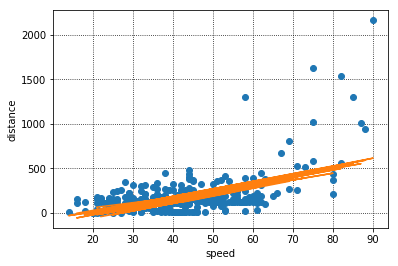

In [17]:
# グラフに重ねて表示する
plt.plot(x[:,1], y, 'o')
plt.ylabel("distance")
plt.xlabel("speed")
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(x[:,1], y_est_sklearn)
plt.show()

# モデルの評価

In [18]:
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix 

In [19]:
# 値を予測
y_pred = regr.predict(df_X)

# MSEを計算
mse = mean_squared_error(y, y_pred) 
print("MSE = %s"%round(mse,3) )  

# MAEを計算
mae = mean_absolute_error(y, y_pred) 
print("MAE = %s"%round(mae,3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

MSE = 31053.875
MAE = 107.62
RMSE = 176.221
